In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from tqdm import tqdm
import concurrent.futures

print(os.listdir())
import matplotlib.pyplot as plt

['youtube.ipynb', 'shaded.png', 'sampling_test.ipynb', 'social_to_adjacency.ipynb', '.ipynb_checkpoints', 'twitch.ipynb', 'musae_facebook_edges.csv', 'Figures', 'social_to_ds.ipynb', 'large_twitch_edges.csv', 'cleaner_algorithm.ipynb', 'generate_figures.ipynb', 'nb_class_assignment.ipynb', '.DS_Store', 'artist_edges.csv']


In [2]:
parent_directory = os.path.dirname(os.getcwd())
data_directory   = os.path.join(parent_directory, "raw_datasets/youtube")

In [3]:
filename = "/home/alex/Projects/GRAN_social/raw_datasets/youtube/com-youtube.ungraph.txt"
dataset_path = os.path.join(data_directory, filename)

social_data = pd.read_csv(dataset_path, delimiter = "\t", skiprows = 3)
print(social_data.shape)
# np.savetxt(r'social_A.txt', social_data.values, fmt='%d', delimiter=",\t")
social_data.head()

(2987624, 2)


,# FromNodeId,ToNodeId
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [4]:
target_filename = "/home/alex/Projects/GRAN_social/raw_datasets/youtube/com-youtube.all.cmty.txt"
target_path     = os.path.join(data_directory, target_filename)

node_to_com = {}

with open(target_path, "r") as f:
    lines = f.readlines()
    for community, l in enumerate(lines):
        nodes = l[:-2].split("\t")
        
        nodes = [int(n) for n in nodes]
        for n in nodes:
            node_to_com[n] = community
            
# print(node_to_com)

In [5]:
# target_filename = "musae_facebook_target.csv"
# target_path     = os.path.join(data_directory, target_filename)

# target_data = pd.read_csv(target_path, delimiter = ",", skiprows = 0)
# target_data.head()

# node_ids = target_data["id"].tolist()
# page_types = target_data["page_type"].tolist()


# unique_page_types = np.unique(page_types)
# int_labels = [i for i in range(unique_page_types.shape[0])]

# conv_dict = {}
# for i, page_type in enumerate(list(unique_page_types)):
#     conv_dict[page_type] = int_labels[i]
    
# print(conv_dict)

# int_labels = {}

# for i, item in enumerate(page_types):
#     int_labels[str(i)] = conv_dict[item]

In [6]:
# import json

# attribute_filename = "musae_facebook_features.json"
# attribute_path     = os.path.join(data_directory, attribute_filename)

# with open(attribute_path, "r") as f:
#     attribute_data = json.load(f)
    
# attribute_shape = len(attribute_data["15"])

# keys = list(attribute_data.keys())
# lengths = [len(attribute_data[l]) for l in keys]
# tokens = []
# for k in keys:
#     tokens += attribute_data[k]
# print(np.unique(lengths))
# print(np.min(tokens))
# print(np.max(tokens))

# def feature_to_token(feature, min_t = 0, max_t = 4800):
#     out_vector = np.zeros(max_t)
#     out_vector[feature] = 1
#     return out_vector

In [7]:
# from umap import UMAP
# embedder = UMAP(n_components = 20, n_neighbors = 100, n_jobs = 6, verbose = 1)

# X = np.array([feature_to_token(attribute_data[k]) for k in keys])
# print(X.shape)

# features = embedder.fit_transform(X)

# plt.scatter(features[:,0], features[:,1])
# plt.show()

In [8]:
# G = nx.Graph()
# for i in tqdm(range(social_data.shape[0])):
#     G.add_edge(social_data.iloc[i, 0], social_data.iloc[i,1])
# edgelist = [(social_data.iloc[i,0], social_data.iloc[i,1]) for i in tqdm(range(social_data.shape[0]))]
# print(edgelist)

columns = list(social_data.columns)
print(columns)

G = nx.from_pandas_edgelist(social_data, columns[0], columns[1], create_using = nx.Graph)

['# FromNodeId', 'ToNodeId']


In [9]:
# n_missed = 0
# have_attributes = list(node_to_com.keys())
# are_nodes = list(G.nodes)
# for n in have_attributes:
#     if n not in are_nodes:
#         n_missed += 1
# print(f"Missed {n_missed} nodes")

In [10]:
# print(repr(list(G.nodes)[:100]))
# print(list(node_to_com.keys()))

In [11]:
n_missed = 0

for i, node in enumerate(tqdm(list(G.nodes))):
    
    if node in list(node_to_com.keys()):
        
    
        G.nodes[node]["target"] = node_to_com[node]
        G.nodes[node]["attribute"] = node_to_com[node]
    else:
        n_missed += 1
        G.nodes[node]["target"] = -1
        G.nodes[node]["attribute"] = -1
print(f"Missed {n_missed} nodes")
    # print(features[i,:])

100%|███████████████████████████████| 1134890/1134890 [11:06<00:00, 1703.76it/s]

Missed 1081223 nodes


In [12]:
G = nx.convert_node_labels_to_integers(G)

(2987624, 2)
1134890
2000
1200000


  0%|                                                   | 0/600 [00:00<?, ?it/s]

(1515,)
0.7575


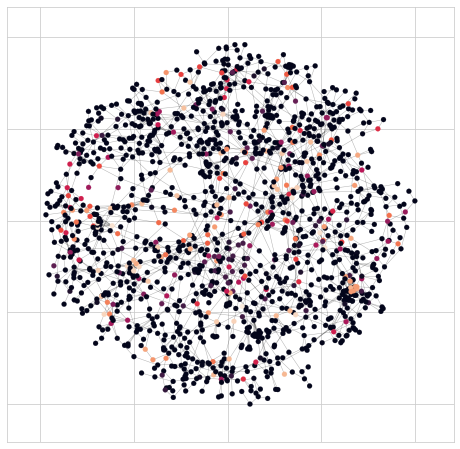

  8%|███▌                                      | 50/600 [00:49<06:54,  1.33it/s]

(51166,)
25.583


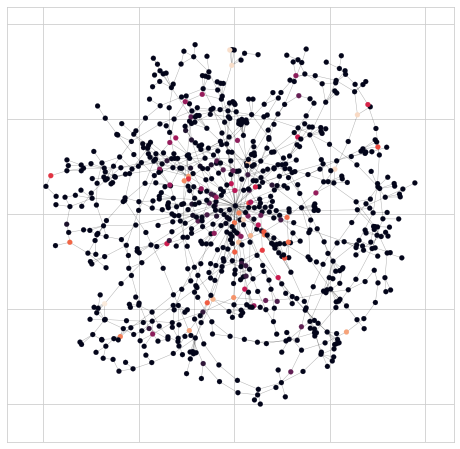

 17%|██████▊                                  | 100/600 [01:33<06:37,  1.26it/s]

(97747,)
48.8735


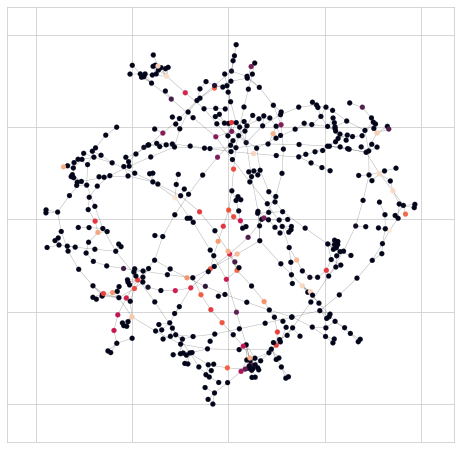

 25%|██████████▎                              | 150/600 [02:13<05:40,  1.32it/s]

(145221,)
72.6105


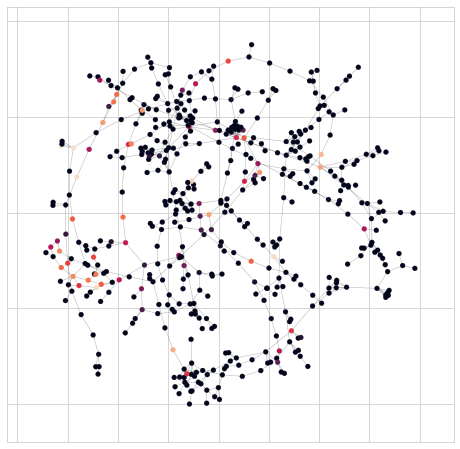

 33%|█████████████▋                           | 200/600 [02:53<05:04,  1.32it/s]

(195162,)
97.581


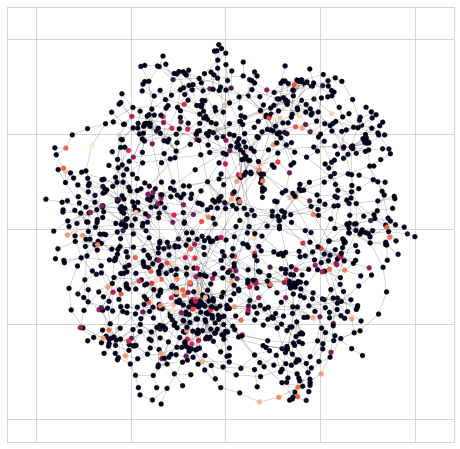

 42%|█████████████████                        | 250/600 [03:41<04:39,  1.25it/s]

(247463,)
123.7315


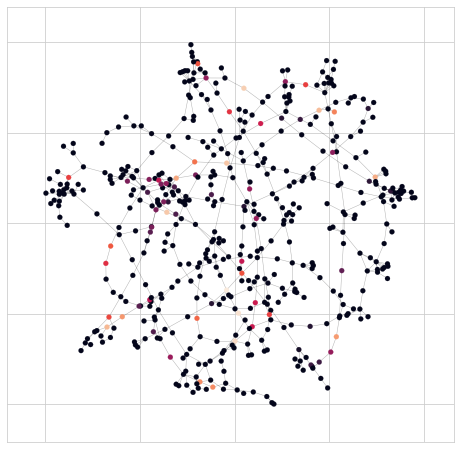

 50%|████████████████████▌                    | 300/600 [04:22<03:58,  1.26it/s]

(302016,)
151.008


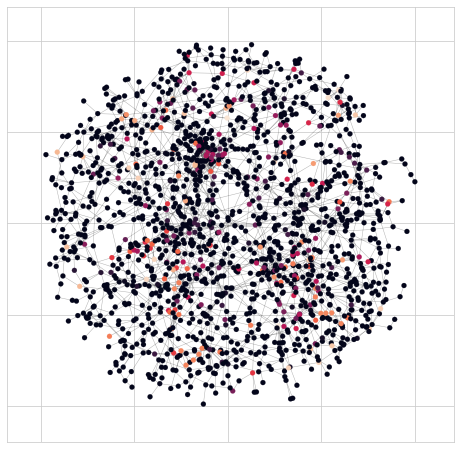

 58%|███████████████████████▉                 | 350/600 [05:15<03:16,  1.27it/s]

(350860,)
175.43


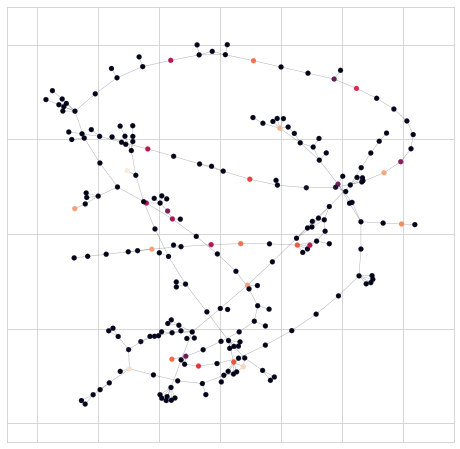

 67%|███████████████████████████▎             | 400/600 [05:54<02:38,  1.26it/s]

(404777,)
202.3885


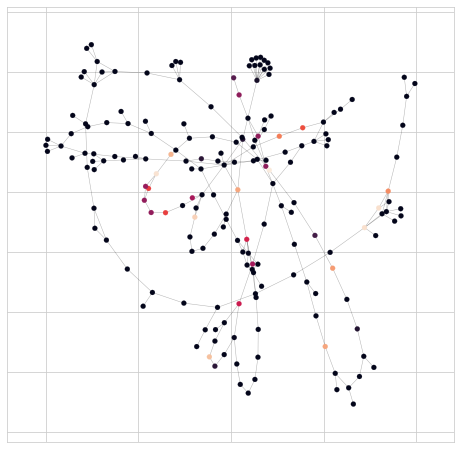

 75%|██████████████████████████████▊          | 450/600 [06:33<01:59,  1.25it/s]

(449194,)
224.597


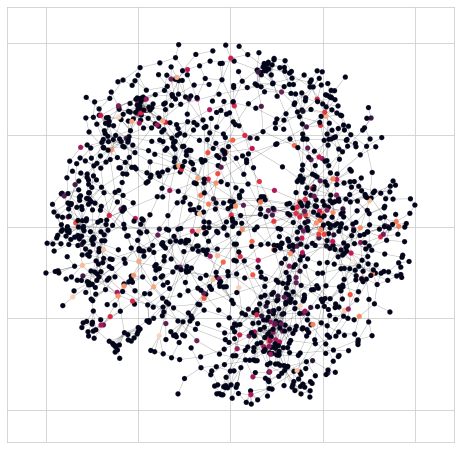

 83%|██████████████████████████████████▏      | 500/600 [07:23<01:16,  1.31it/s]

(503298,)
251.649


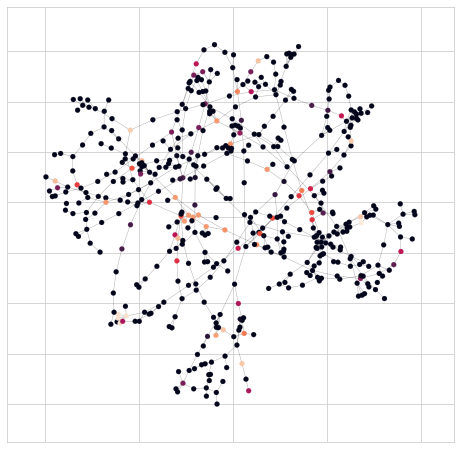

 92%|█████████████████████████████████████▌   | 550/600 [08:04<00:38,  1.30it/s]

(561326,)
280.663


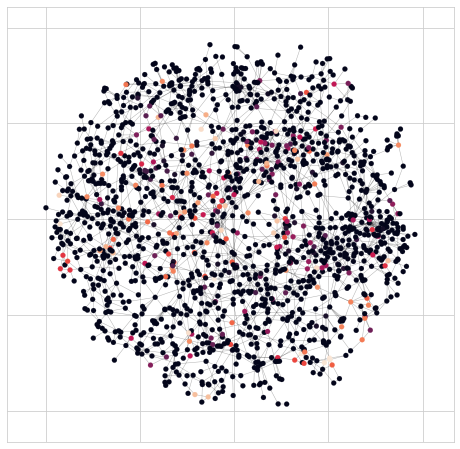

100%|█████████████████████████████████████████| 600/600 [08:55<00:00,  1.12it/s]

(743363, 2)
(610469,)


In [13]:
from littleballoffur import ForestFireSampler, MetropolisHastingsRandomWalkSampler, RandomWalkSampler, DiffusionSampler
print(social_data.shape)
n_nodes = np.unique(social_data.values).shape[0]
print(n_nodes)
n_graphs = 600

graph_ind_array = np.zeros(n_nodes)
min_per_graph = 20
n_per_graph = 2000#int(n_nodes / n_graphs)

print(n_per_graph)

total_n = n_per_graph * n_graphs



print(total_n)
graph_ind_array = np.zeros(total_n)


#number_of_nodes = int(0.5*graph.number_of_nodes())

offset_index = 0
for i in tqdm(range(n_graphs)):
    
    
    sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = np.random.randint(min_per_graph, n_per_graph), #n_per_graph,#
                               seed = np.random.randint(1, 1e9))
    new_graph = sampler.sample(G)
    
    # print(len(list(new_graph.nodes())))
    
    new_graph = nx.convert_node_labels_to_integers(new_graph, first_label=offset_index)
    
    graph_ind_array[offset_index:(i+1) * n_per_graph] = i+1
    
    nodes = list(new_graph.nodes())
    
    node_labels_g = [new_graph.nodes[n]["target"] for n in new_graph.nodes]
    node_attrs_g = [new_graph.nodes[n]["attribute"] for n in new_graph.nodes]
    
    
    if i ==0:
        graph_adj = np.array(new_graph.edges())
        graph_ind_array = np.array(np.full(len(nodes), i+1))
        node_labels = np.array(node_labels_g)
        node_attrs = np.array(node_attrs_g)
        
    else:
        graph_adj = np.append(graph_adj, np.array(new_graph.edges()), axis = 0)
        graph_ind_array = np.append(graph_ind_array, np.array(np.full(len(nodes), i+1)))
        node_labels = np.append(node_labels, node_labels_g)
        node_attrs = np.append(node_attrs, node_attrs_g, axis = 0)
    
    if i % 50 == 0:
        print(node_attrs.shape)
        print(node_attrs.shape[0]/n_per_graph)
        
        plt.figure(figsize = (8,8))
        
        pos = nx.spring_layout(
          new_graph, k=0.1, iterations=100)
        
        
        colors = []
        
        for g in new_graph.nodes:
            colors.append(new_graph.nodes[g]["target"])
        
        nx.draw_networkx_nodes(
          new_graph,
          pos,
          node_size=25,
          node_color=colors,
          alpha=1,
          linewidths=0.2)#,
          # font_size=1.5)
        nx.draw_networkx_edges(new_graph, pos, alpha=0.3, width=0.5)

        plt.savefig(f"graph_example{i}.jpg")
        plt.show()
    offset_index += len(nodes)

print(graph_adj.shape)
print(graph_ind_array.shape)

total_n = graph_ind_array.shape[0]

In [14]:
node_attrs.shape

(610469,)

In [15]:
data_dir =        "/home/alex/Projects/GRAN_social/data/YOUTUBE/"

# for file in os.listdir(data_dir):
#     print(file)
#     if "DUMMY" in file:
#         shutil.rmtree(f"{data_dir}{file}")

np.savetxt(f'{data_dir}YOUTUBE_A.txt', graph_adj, fmt='%d', delimiter=",\t")
np.savetxt(f'{data_dir}YOUTUBE_graph_indicator.txt',graph_ind_array, fmt="%d")

np.savetxt(f'{data_dir}YOUTUBE_node_labels.txt', node_labels, fmt = "%d")
print(node_labels.shape)

np.savetxt(f'{data_dir}YOUTUBE_node_attributes.txt', node_attrs, fmt = "%f", delimiter=",")
print(node_labels.shape)

# np.savetxt(f'{data_dir}FACEBOOK_LARGE_node_attributes.txt', node_labels, fmt = "%d")
# print(node_labels.shape)

np.savetxt(f'{data_dir}YOUTUBE_graph_labels.txt', np.ones(total_n), fmt = "%d")
print(np.ones(total_n).shape)


        
# np.savetxt(r'social_A.txt', graph_adj, fmt='%d', delimiter=",\t")
# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")

# np.savetxt(r'social_node_labels.txt', np.arange(1, total_n+1), fmt = "%d")
# print(np.arange(1, total_n+1).shape)

# np.savetxt(r'social_graph_labels.txt', np.ones(total_n), fmt = "%d")
# print(np.ones(total_n).shape)

(610469,)
(610469,)
(610469,)


In [16]:
# print(social_data.shape)
# n_nodes = np.unique(social_data.values).shape[0]
# print(n_nodes)
# n_graphs = 100

# graph_ind_array = np.zeros(n_nodes)
# n_per_graph = int(n_nodes / n_graphs)

# print(n_per_graph)

# G_ids = []

# for i in range(n_graphs):
    
#     G2 = nx.Graph()

#     for node in G.nodes():
        
#         neighbours = list(G.neighbors(node))


In [17]:


# # for i in range(n_graphs):
    
# #     graph_ind_array[i*n_per_graph : (i+1)*n_per_graph] = i+1
    
# #     if i == n_graphs - 1:
# #         graph_ind_array[(i+1)*n_per_graph:] = i+1

# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")
# print(graph_ind_array.shape)

In [18]:
# np.savetxt(r'social_node_labels.txt', np.arange(1, n_nodes+1), fmt = "%d")
# print(np.arange(1, n_nodes+1).shape)

In [19]:
# np.savetxt(r'social_graph_labels.txt', np.ones(n_nodes), fmt = "%d")
# print(np.ones(n_nodes).shape)

In [20]:
# adj = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_A.txt", delimiter = ",|\n")
# adj.shape

In [21]:
# g_ind = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_graph_indicator.txt", delimiter = ",|\n")
# g_ind.shape

In [22]:
# n_lab = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_node_labels.txt", delimiter = ",|\n")
# n_lab.shape